# Activation function
(refer to the blog : https://medium.com/@anushruthikae/all-about-activation-functions-choosing-the-right-activation-function-a63844e49a2a )
## Step function: 
* also known as the Heaviside step function as it takes on one of two constant values.
* H(x) = { 0 for x < 0, 1 for x ≥ 0 }
* Advantages: Simplicity and Binary Output
* Disadvantages: Lack of Continuity and Non-Differentiability(not suitable for Gradient-Based Learning which uses derivatives ) at x = 0.

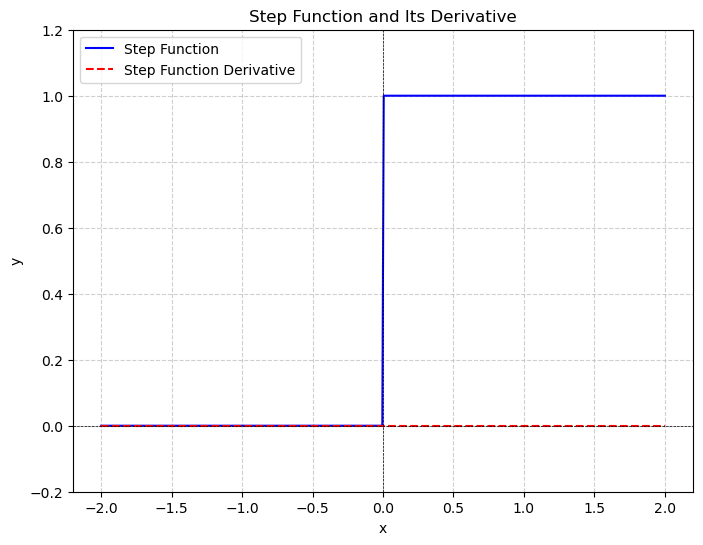

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Heaviside step function
def step_function(x):
    return np.piecewise(x, [x < 0, x >= 0], [0, 1])

# Define the derivative of the Heaviside step function
def step_function_derivative(x):
    return np.piecewise(x, [x < 0, x == 0, x > 0], [0, 0, 0])

# Create an array of x values
x = np.linspace(-2, 2, 400)

# Calculate the corresponding y values for both the step function and its derivative
y_step = step_function(x)
y_derivative = step_function_derivative(x)

# Plot the step function
plt.figure(figsize=(8, 6))
plt.plot(x, y_step, label='Step Function', color='b')

# Plot the derivative of the step function
plt.plot(x, y_derivative, label='Step Function Derivative', linestyle='--', color='r')

plt.title('Step Function and Its Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper left')
plt.ylim(-0.2, 1.2)

plt.show()


## Sigmoid :
* also known as the logistic function
* σ(x) = 1 / (1 + e^(-x))
* The function maps any real number to a value between 0 and 1.
* graph: S-shaped curve. It starts at zero, rises slowly from -∞ to ∞, and approaches 1 as the input becomes large (positive or negative).
* derivative values are in the range [0, 0.25], with a maximum value of approximately 0.25 occurring at the midpoint x=0, which is useful in gradient-based optimization algorithms.
* Advantages: Smooth Gradient and Output Range (0-1) which is useful in the context of probabilities.
* Disadvantages: 
    * Vanishing Gradients:  For very positive or very negative inputs, the gradient becomes extremely small, causing slow convergence and low learing rate.
    * Output Not Centered at Zero: slow down learning & lead to vanishing gradient descent or the outputs of hidden neurons in subsequent layers are influenced by the outputs of neurons in previous layers, which can become biased towards either 0 or 1.
    * Not Sparse: they always produce some activation regardless of the input.

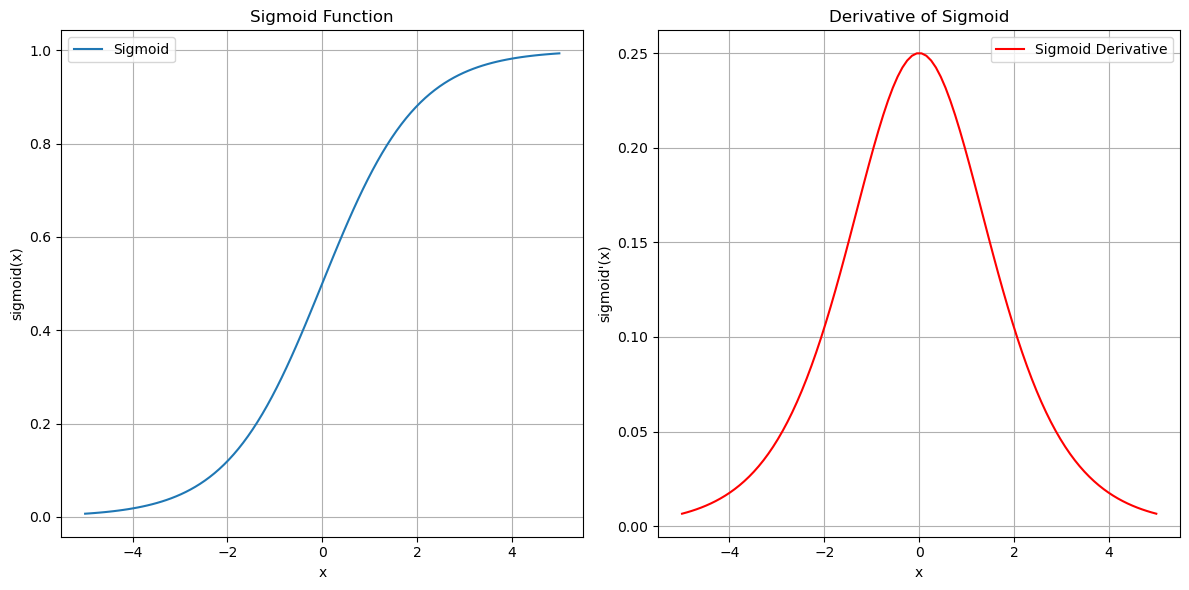

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Create a range of values for x
x = np.linspace(-5, 5, 100)

# Calculate sigmoid values
sigmoid_values = sigmoid(x)

# Calculate sigmoid derivative values
sigmoid_derivative_values = sigmoid_derivative(x)

# Create subplots
plt.figure(figsize=(12, 6))

# Plot the sigmoid function
plt.subplot(121)
plt.plot(x, sigmoid_values, label='Sigmoid')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)
plt.legend()

# Plot the derivative of sigmoid
plt.subplot(122)
plt.plot(x, sigmoid_derivative_values, label='Sigmoid Derivative', color='red')
plt.title('Derivative of Sigmoid')
plt.xlabel('x')
plt.ylabel('sigmoid\'(x)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


## Tanh:
* hyperbolic tangent , tanh(x) = (e^x - e^(-x)) / (e^x + e^(-x))
* graph: S-shaped curve , symmetric around the origin. This means that the tanh function outputs negative values for negative inputs and positive values for positive inputs, ranging between -1 and 1.
* Advantages:
    * Zero-Centered: mitigate the vanishing gradient problem.
    * Stronger Gradients: steeper gradients around the origin, lead to faster convergence 
* Disadvantages: Vanishing Gradient

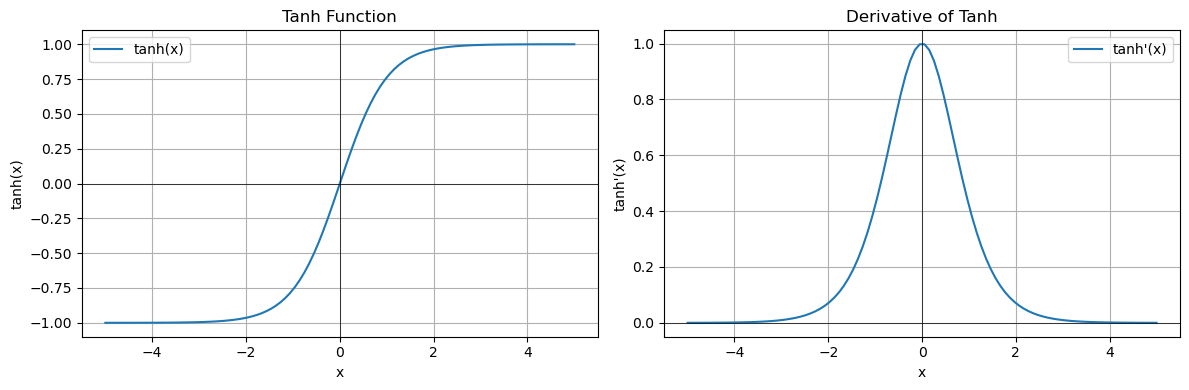

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of x values
x = np.linspace(-5, 5, 100)

# Calculate the tanh function
tanh_x = np.tanh(x)

# Calculate the derivative of tanh
tanh_derivative = 1 - np.tanh(x)**2

# Create subplots to display the tanh and its derivative
plt.figure(figsize=(12, 4))

# Plot the tanh function
plt.subplot(1, 2, 1)
plt.plot(x, tanh_x, label='tanh(x)')
plt.title('Tanh Function')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()

# Plot the derivative of tanh
plt.subplot(1, 2, 2)
plt.plot(x, tanh_derivative, label="tanh'(x)")
plt.title("Derivative of Tanh")
plt.xlabel("x")
plt.ylabel("tanh'(x)")
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()

plt.tight_layout()
plt.show()


## ReLU

* f(x) = max(0, x)
* returns the input value if it's positive and returns zero if the input is negative.
* is a piecewise linear function with a "kink" at x = 0. it's linear for positive values of `x` and zero for negative values of `x`
* ReLU'(x), is a piecewise function as well. For all x values greater than zero, ReLU'(x) = 1, less than or equal to zero, ReLU'(x) = 0
* Key Characteristics:
    * Piecewise Linear
    * Non-Linearity: 
    * Sparsity: sets all negative values to zero reduce overfitting.
    * Vanishing Gradient
    * Rectification: rectifies (sets to zero) any negative input values
    * Range: [0, ∞)
* Advantages:
    * Simplicity
    * Non-linearity:
    * Mitigating Vanishing Gradient: 

* Disadvantages:
    * Dead Neurons: ReLU neurons can sometimes be "dead" (always output zero) during training if their weights are updated in a way that keeps their inputs always negative. This can slow down learning.
    * Not Centered at Zero: convergence issues 
    * Exploding Gradients:less common than the vanishing gradient problem.

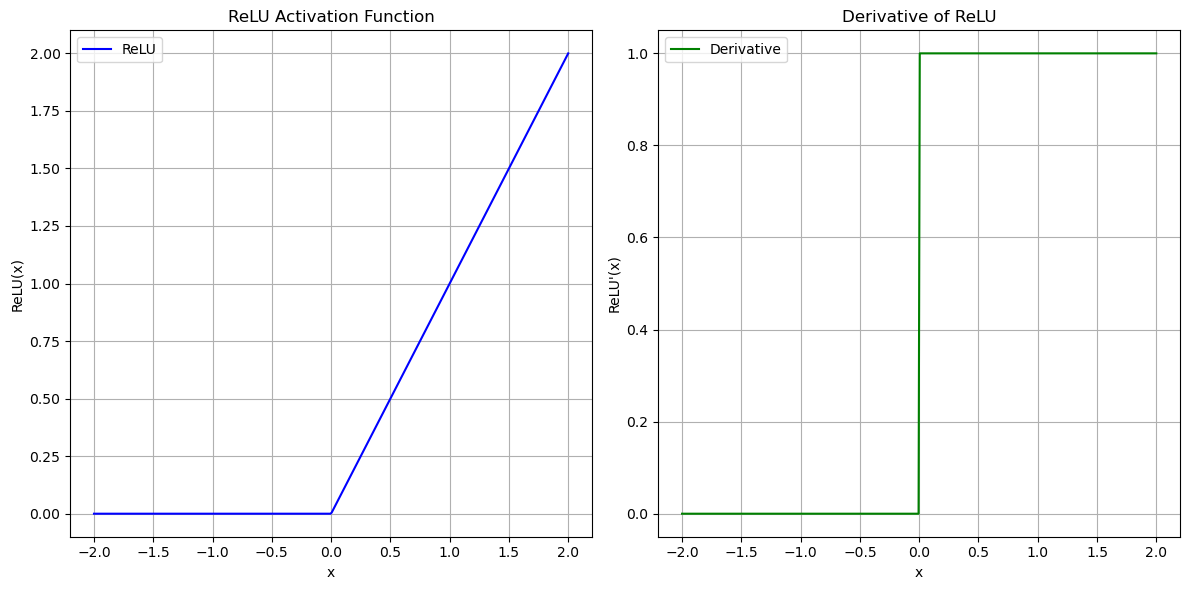

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ReLU activation function
def relu(x):
    return np.maximum(0, x)

# Define the derivative of the ReLU function
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Create a range of values for the x-axis
x = np.linspace(-2, 2, 400)

# Calculate ReLU values
relu_values = relu(x)

# Calculate derivative values
derivative_values = relu_derivative(x)

# Create subplots to display both the ReLU and its derivative
plt.figure(figsize=(12, 6))

# Plot ReLU
plt.subplot(1, 2, 1)
plt.plot(x, relu_values, label='ReLU', color='b')
plt.title('ReLU Activation Function')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.grid()
plt.legend()

# Plot ReLU derivative
plt.subplot(1, 2, 2)
plt.plot(x, derivative_values, label='Derivative', color='g')
plt.title('Derivative of ReLU')
plt.xlabel('x')
plt.ylabel("ReLU'(x)")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


## Leaky ReLU

* Leaky ReLU(x) = x if x > 0 , Leaky ReLU(x) = α * x if x <= 0
* address Dead Neurons in ReLU.
* Characteristics:
    * Non-linearity:
    * Variability: small slope for negative 
* Advantages:
    * Mitigates "Dying ReLU" Problem
    * Non-zero Mean: easy optimisation.
* Disadvantages:
    *  Unbounded Activation: can produce very large or very small activations which lead to exploding gradients.

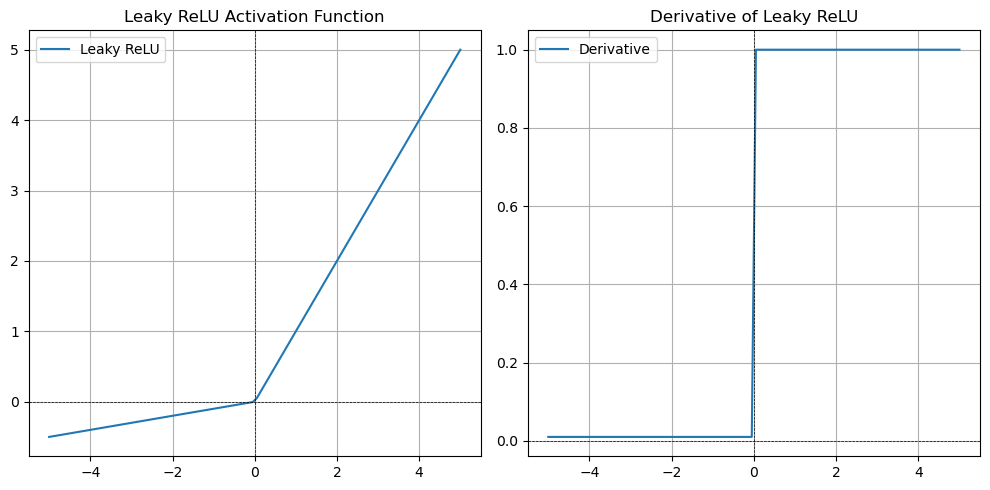

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Leaky ReLU function
def leaky_relu(x, alpha=0.1):
    return np.where(x > 0, x, alpha * x)

# Derivative of Leaky ReLU
def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

# Create a range of values for x
x = np.linspace(-5, 5, 100)

# Compute Leaky ReLU values and its derivative
y = leaky_relu(x)
dy = leaky_relu_derivative(x)

# Plot Leaky ReLU
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, y, label='Leaky ReLU')
plt.title('Leaky ReLU Activation Function')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()

# Plot the derivative of Leaky ReLU
plt.subplot(1, 2, 2)
plt.plot(x, dy, label='Derivative')
plt.title('Derivative of Leaky ReLU')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()

plt.tight_layout()
plt.show()


## Paramertized ReLU

* Key Differences between Leaky ReLU and Parameterized ReLU: Leaky ReLU has a fixed, predefined slope (α) set by the user that remains the same for all neurons and features. In contrast, PReLU introduces learnable parameters, allowing different neurons to have different slopes learned from the data during training therefore more flexible because it can adapt.
* Characteristics:
    * Non-linearity
    * Learnable Parameters: adds a slope to the negative side
    * Variability: adapt to different types of data.
* Advantages:
    *  Mitigating Dead Neurons:
    * Increased Model Flexibility: learn different slopes for different neurons.
    * Improved Training: It can lead to faster and more stable convergence during training.
* Disadvantages:
    * Increased Model Complexity: prone to overfitting if not properly regularized.


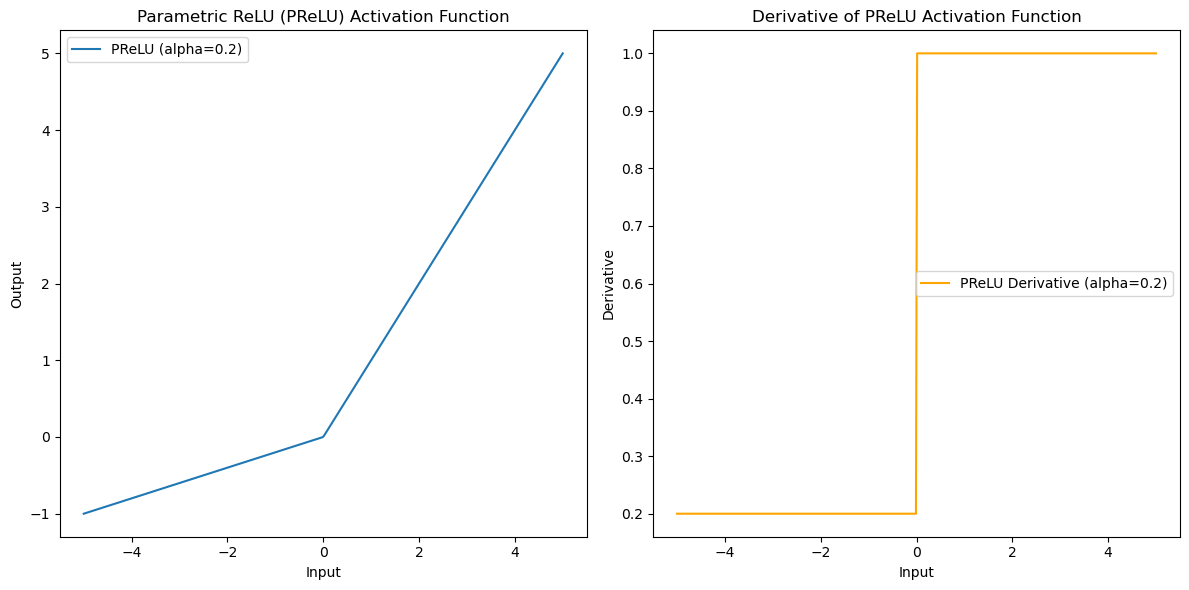

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the PReLU activation function
def prelu(x, alpha):
    return np.maximum(0, x) + alpha * np.minimum(0, x)

# Define the derivative of the PReLU activation function
def prelu_derivative(x, alpha):
    return np.where(x > 0, 1, alpha)

# Range of input values
x = np.linspace(-5, 5, 400)

# Set the PReLU slope (alpha)
alpha = 0.2

# Calculate the PReLU and its derivative
y_prelu = prelu(x, alpha)
y_prelu_derivative = prelu_derivative(x, alpha)

# Create subplots for the PReLU and its derivative
plt.figure(figsize=(12, 6))

# Plot the PReLU function
plt.subplot(1, 2, 1)
plt.plot(x, y_prelu, label=f'PReLU (alpha={alpha})')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Parametric ReLU (PReLU) Activation Function')
plt.legend()

# Plot the derivative of the PReLU function
plt.subplot(1, 2, 2)
plt.plot(x, y_prelu_derivative, label=f'PReLU Derivative (alpha={alpha})', color='orange')
plt.xlabel('Input')
plt.ylabel('Derivative')
plt.title('Derivative of PReLU Activation Function')
plt.legend()

plt.tight_layout()
plt.show()


## Exponential Linear Unit

* For x > 0: eLU(x) = x , For x <= 0: eLU(x) = alpha * (e^x - 1)
* limitations of the traditional ReLU function, especially the "dying ReLU" by modifying the slope of the negative part of the function using a log curve.
* Characteristics: 
    * non -zero centric
    * will give inputs for negative values
    * no vanishing gradient or dead neuron
    * no need to find derivative of zero
    * time comlpexity as exponential derivative.
* advantages: 
    * Avoids the "dying ReLU" problem
    * Smooth gradient
    * Allows negative values
* Disadvantages:
    * Computational cost expensive to caluculate expensive.
    * Not zero-centered

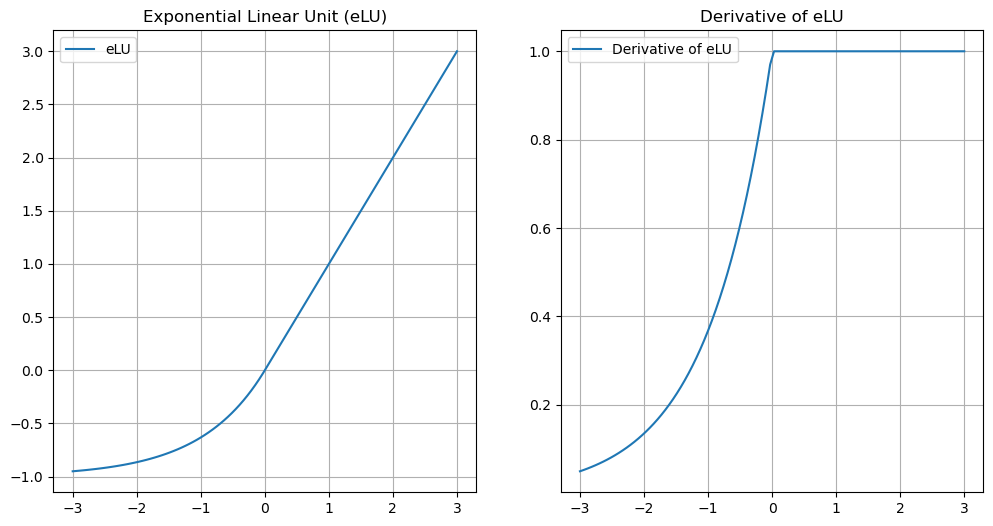

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the eLU function
def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

# Define the derivative of eLU
def elu_derivative(x, alpha=1.0):
    return np.where(x > 0, 1, alpha * np.exp(x))

# Generate x values
x = np.linspace(-3, 3, 100)

# Calculate y values using eLU and its derivative
y_elu = elu(x)
y_derivative = elu_derivative(x)

# Create subplots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, y_elu, label="eLU")
plt.title("Exponential Linear Unit (eLU)")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, y_derivative, label="Derivative of eLU")
plt.title("Derivative of eLU")
plt.grid()
plt.legend()

plt.show()



## Swish Activation function

* newer activation function introduced by researchers at Google. 
* smoothness 
* designed to combine some of the advantages of other activation functions.
* Swish(x) = x * sigmoid(beta * x) , `beta` is a hyperparameter that can be tuned.

Characteristics:
1. Smoothness: 
2. Non-linearity: 
3. Zero-Centered: it has values around zero for most inputs

Advantages:
1. Training Speed: due to its non-monotonic, convex shape.
2. Smoothness
3. Zero-Centered:
4. Empirical Performance: good 

Disadvantages:
1. Computational Cost: 
2. Hyperparameter: The `beta` hyperparameter in the Swish function needs to be tuned. While setting it to 1 is common, it might not be the optimal value for all tasks.
3. Lack of Theoretical Justification: 

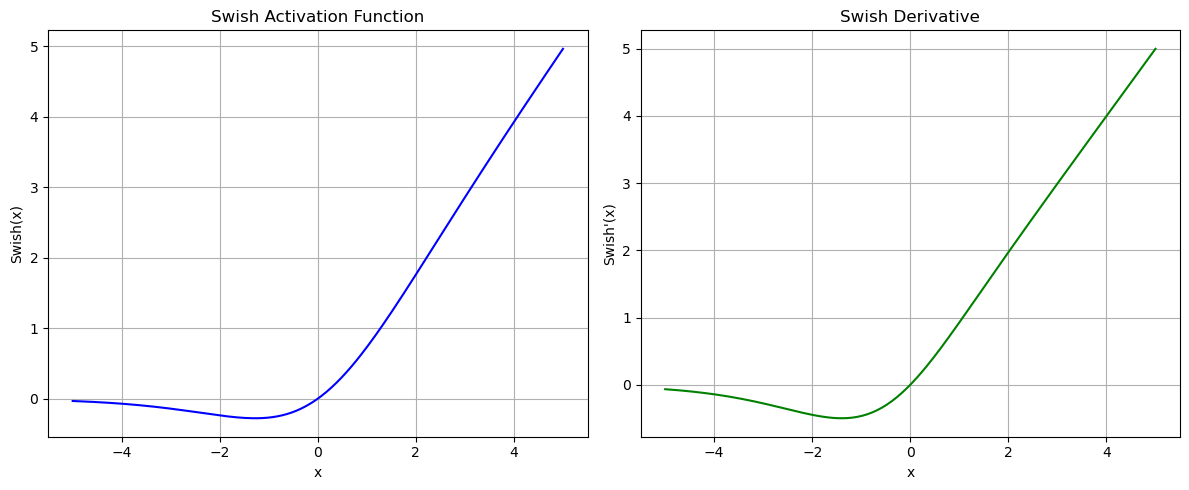

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def swish(x, beta=1):
    return x * (1 / (1 + np.exp(-beta * x)))

def swish_derivative(x, beta=1):
    sigmoid_x = 1 / (1 + np.exp(-beta * x))
    return swish(x, beta) + x * beta * sigmoid_x * (1 - sigmoid_x)

# Generate x values
x = np.linspace(-5, 5, 200)

# Compute Swish and its derivative values
swish_values = swish(x)
derivative_values = swish_derivative(x)

# Create subplots
plt.figure(figsize=(12, 5))

# Plot Swish activation function
plt.subplot(1, 2, 1)
plt.plot(x, swish_values, label='Swish', color='b')
plt.title('Swish Activation Function')
plt.xlabel('x')
plt.ylabel('Swish(x)')
plt.grid(True)

# Plot Swish derivative
plt.subplot(1, 2, 2)
plt.plot(x, derivative_values, label='Swish Derivative', color='g')
plt.title('Swish Derivative')
plt.xlabel('x')
plt.ylabel("Swish'(x)")
plt.grid(True)

plt.tight_layout()
plt.show()


## Soft Max Activation Function
* <img src= "images/softmax.png" style="width:200px; height:50px;">
* The softmax activation function is commonly used in multi-class classification problems.
* It takes an input vector and squashes the values between 0 and 1, normalizing them so that they add up to 1. 
* This makes it useful for converting a vector of arbitrary real values into a probability distribution.
* example: For instance if you have three classes, there would be three neurons in the output layer. Suppose you got the output from the neurons as [1.2 , 0.9 , 0.75]. Applying the softmax function over these values, you will get the following result – [0.42 ,  0.31, 0.27]. These represent the probability for the data point belonging to each class. Note that the sum of all the values is 1.
* Characteristics:
    * Normalization: 
    * Non-Negativity: output range 0-1.
    * Differentiability:  training neural networks using gradient-based optimization algorithms.
* Advantages:
    1. Interpretability: clear probability distribution over classes
    2. Compatibility: Well-suited for multi-class classification tasks.
* Disadvantages:
    1. Sensitivity to Outliers
    2. Mutual Exclusivity: not be suitable for all problems.



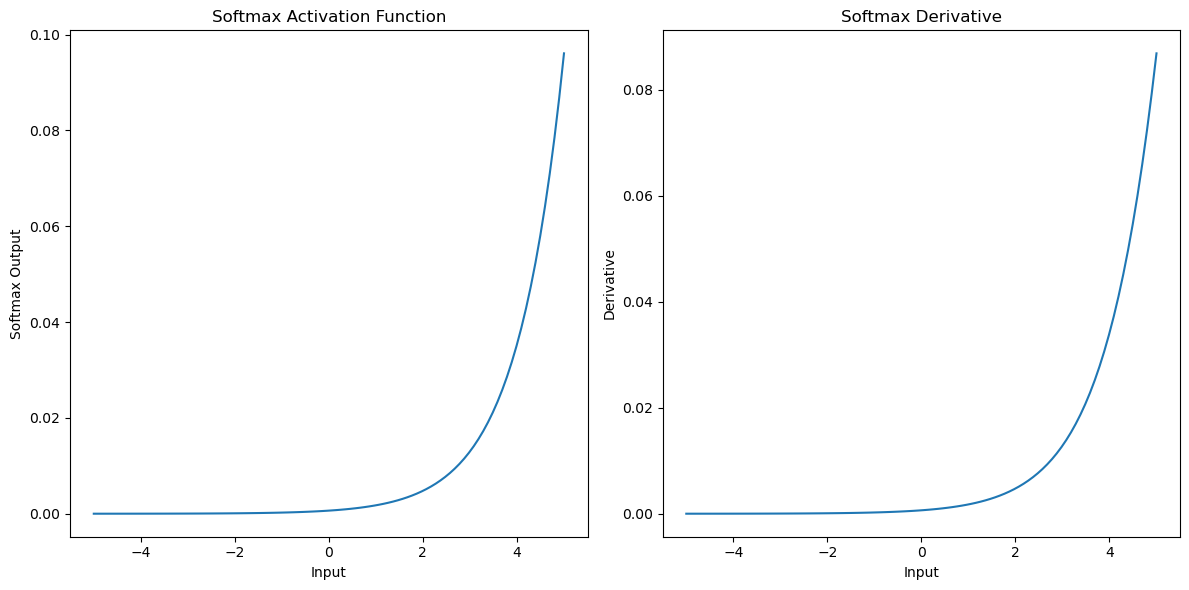

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

def softmax_derivative(x):
    s = softmax(x)
    return s * (1 - s)

# Generate input values
x_values = np.linspace(-5, 5, 100)

# Calculate softmax values
softmax_values = softmax(x_values)

# Calculate softmax derivative values
softmax_derivative_values = softmax_derivative(x_values)

# Plot softmax function
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x_values, softmax_values)
plt.title('Softmax Activation Function')
plt.xlabel('Input')
plt.ylabel('Softmax Output')

# Plot softmax derivative function
plt.subplot(1, 2, 2)
plt.plot(x_values, softmax_derivative_values)
plt.title('Softmax Derivative')
plt.xlabel('Input')
plt.ylabel('Derivative')

plt.tight_layout()
plt.show()


## Manual Implementation of Activation functions

In [ ]:
import numpy as np

def step_function(x):
    return np.where(x > 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def param_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def exponential_relu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def swish(x, beta=1.0):
    return x / (1 + np.exp(-beta * x))

def softmax(x):
    exp_values = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_values / np.sum(exp_values, axis=-1, keepdims=True)

def main():
    input_array = np.array([1, 2, 3, 4, 5])

    # Applying activation functions
    step_output = step_function(input_array)
    sigmoid_output = sigmoid(input_array)
    tanh_output = tanh(input_array)
    relu_output = relu(input_array)
    leaky_relu_output = leaky_relu(input_array)
    param_relu_output = param_relu(input_array)
    exp_relu_output = exponential_relu(input_array)
    swish_output = swish(input_array)
    softmax_output = softmax(input_array)

    # Displaying results
    print("Input Array:", input_array)
    print("Step Function Output:", step_output)
    print("Sigmoid Output:", sigmoid_output)
    print("Tanh Output:", tanh_output)
    print("ReLU Output:", relu_output)
    print("Leaky ReLU Output:", leaky_relu_output)
    print("Parameterized ReLU Output:", param_relu_output)
    print("Exponential ReLU Output:", exp_relu_output)
    print("Swish Output:", swish_output)
    print("Softmax Output:", softmax_output)

if __name__ == "__main__":
    main()


## Tensor Flow implementation

In [2]:
import tensorflow as tf

# Input array
input_array = tf.constant([[-2.0, -1.0, 0.0, 1.0, 2.0]])

# Apply Activation Functions
output_step = tf.keras.activations.relu(input_array, threshold=0.0)  # ReLU
output_sigmoid = tf.keras.activations.sigmoid(input_array)  # Sigmoid
output_tanh = tf.keras.activations.tanh(input_array)  # Tanh
output_relu = tf.keras.activations.relu(input_array)  # ReLU
output_leaky_relu = tf.keras.activations.relu(input_array, alpha=0.01)  # Leaky ReLU
output_param_relu = tf.keras.activations.relu(input_array, alpha=0.1)  # Parametric ReLU
output_elu = tf.keras.activations.elu(input_array)  # ELU
output_swish = tf.keras.activations.swish(input_array)  # Swish
output_softmax = tf.keras.activations.softmax(input_array) # Soft Max


# Print Outputs
print("Input Array:", input_array.numpy())
print("Output (ReLU):", output_relu.numpy())
print("Output (Sigmoid):", output_sigmoid.numpy())
print("Output (Tanh):", output_tanh.numpy())
print("Output (Leaky ReLU):", output_leaky_relu.numpy())
print("Output (Parametric ReLU):", output_param_relu.numpy())
print("Output (ELU):", output_elu.numpy())
print("Output (Swish):", output_swish.numpy())
print("Output (Softmax):", output_softmax.numpy())


Input Array: [[-2. -1.  0.  1.  2.]]
Output (ReLU): [[0. 0. 0. 1. 2.]]
Output (Sigmoid): [[0.11920292 0.26894143 0.5        0.7310586  0.8807971 ]]
Output (Tanh): [[-0.9640276 -0.7615942  0.         0.7615942  0.9640276]]
Output (Leaky ReLU): [[-0.02 -0.01  0.    1.    2.  ]]
Output (Parametric ReLU): [[-0.2 -0.1  0.   1.   2. ]]
Output (ELU): [[-0.86466473 -0.63212055  0.          1.          2.        ]]
Output (Swish): [[-0.23840584 -0.26894143  0.          0.7310586   1.7615942 ]]
Output (Softmax): [[0.01165623 0.03168492 0.08612854 0.23412165 0.6364086 ]]
